In [1]:
import sys
import pandas as pd

uriage_data=pd.read_csv("uriage.csv")
uriage_data.head()

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02,상품A,100.0,김가온
1,2019-07-13 13:05,상 품 S,NaN,김우찬
2,2019-05-11 19:42,상 품 a,NaN,김유찬
3,2019-02-12 23:40,상품Z,2600.0,김재현
4,2019-04-22 3:09,상품a,NaN,김강현


In [2]:
kokayaku_data=pd.read_excel("kokyaku_daicho.xlsx")
kokayaku_data.head()

,고객이름,지역,등록일
0,김 현성,H시,2018-01-04 00:00:00
1,김 도윤,E시,42782
2,김 지한,A시,2018-01-07 00:00:00
3,김 하윤,F시,42872
4,김 시온,E시,43127


In [3]:
uriage_data["purchase_date"]=pd.to_datetime(uriage_data["purchase_date"])
uriage_data["purchase_month"]=uriage_data["purchase_date"].dt.strftime("%y%m")
res=uriage_data.pivot_table(index="purchase_month",columns="item_name",aggfunc="size",fill_value=0)
res

item_name,상 품 n,상품 E,상품 M,상품 P,상품 S,상품 W,상품 X,상품W,상 품O,상 품Q,...,상품k,상품l,상품o,상품p,상품r,상품s,상품t,상품v,상품x,상품y
purchase_month,,,,,,,,,,,,,,,,,,,,,
1901,1,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
1902,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,1,0,0
1903,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1904,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
1905,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1906,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1907,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,2,0,0,0,0,0


In [4]:
kokyaku_data=pd.read_excel("kokyaku_daicho.xlsx")
kokyaku_data.head()

,고객이름,지역,등록일
0,김 현성,H시,2018-01-04 00:00:00
1,김 도윤,E시,42782
2,김 지한,A시,2018-01-07 00:00:00
3,김 하윤,F시,42872
4,김 시온,E시,43127


In [5]:
fig_is_serial=kokyaku_data["등록일"].astype("str").str.isdigit()
fig_is_serial.sum()

22

In [6]:
fromSerial=pd.to_timedelta(kokyaku_data.loc[fig_is_serial,"등록일"].astype("float"),unit="D")+pd.to_datetime("1900/01/01")
fromSerial

1     2017-02-18
3     2017-05-19
4     2018-01-29
21    2017-07-06
27    2017-06-17
47    2017-01-08
49    2017-07-15
53    2017-04-10
76    2018-03-31
80    2018-01-12
99    2017-06-01
114   2018-06-05
118   2018-01-31
122   2018-04-18
139   2017-05-27
143   2017-03-26
155   2017-01-21
172   2018-03-24
179   2017-01-10
183   2017-07-26
186   2018-07-15
192   2018-06-10
Name: 등록일, dtype: datetime64[ns]

In [7]:
fromString=pd.to_datetime(kokyaku_data.loc[~fig_is_serial,"등록일"])
fromString

0     2018-01-04
2     2018-01-07
5     2017-06-20
6     2018-06-11
7     2017-05-19
         ...    
195   2017-06-20
196   2018-06-20
197   2017-04-29
198   2019-04-19
199   2019-04-23
Name: 등록일, Length: 178, dtype: datetime64[ns]

In [8]:
kokyaku_data["등록일"]=pd.concat([fromSerial,fromString])
kokyaku_data

,고객이름,지역,등록일
0,김 현성,H시,2018-01-04
1,김 도윤,E시,2017-02-18
2,김 지한,A시,2018-01-07
3,김 하윤,F시,2017-05-19
4,김 시온,E시,2018-01-29
...,...,...,...
195,김 재희,G시,2017-06-20
196,김 도영,E시,2018-06-20
197,김 이안,F시,2017-04-29
198,김 시현,H시,2019-04-19


In [9]:
kokyaku_data["등록연월"]=kokyaku_data["등록일"].dt.strftime("%Y%m")
rslt=kokyaku_data.groupby("등록연월").count()["고객이름"]
print(rslt)

등록연월
201701    15
201702    11
201703    14
201704    15
201705    13
201706    14
201707    17
201801    13
201802    15
201803    17
201804     5
201805    19
201806    13
201807    17
201904     2
Name: 고객이름, dtype: int64


In [10]:
join_data=pd.merge(uriage_data,kokyaku_data,left_on="customer_name",right_on="고객이름",how="left")
join_data=join_data.drop("customer_name",axis=1)
join_data

,purchase_date,item_name,item_price,purchase_month,고객이름,지역,등록일,등록연월
0,2019-06-13 18:02:00,상품A,100.0,1906,NaN,NaN,NaT,NaN
1,2019-07-13 13:05:00,상 품 S,NaN,1907,NaN,NaN,NaT,NaN
2,2019-05-11 19:42:00,상 품 a,NaN,1905,NaN,NaN,NaT,NaN
3,2019-02-12 23:40:00,상품Z,2600.0,1902,NaN,NaN,NaT,NaN
4,2019-04-22 03:09:00,상품a,NaN,1904,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...
2994,2019-02-15 02:56:00,상품Y,2500.0,1902,NaN,NaN,NaT,NaN
2995,2019-06-22 04:03:00,상품M,1300.0,1906,NaN,NaN,NaT,NaN
2996,2019-03-29 11:14:00,상품Q,NaN,1903,NaN,NaN,NaT,NaN
2997,2019-07-14 12:56:00,상품H,NaN,1907,NaN,NaN,NaT,NaN


In [11]:
# fromSerial=pd.to_timedelta(kokyaku_data.loc[fig_is_serial,"등록일"].
#                            astype("float"),unit="0")+pd.to_datetime("1900/01/01")
# fromSerial

In [12]:
dump_data=join_data[["purchase_date","purchase_month","item_name","item_price","고객이름","지역","등록일"]]
dump_data

,purchase_date,purchase_month,item_name,item_price,고객이름,지역,등록일
0,2019-06-13 18:02:00,1906,상품A,100.0,NaN,NaN,NaT
1,2019-07-13 13:05:00,1907,상 품 S,NaN,NaN,NaN,NaT
2,2019-05-11 19:42:00,1905,상 품 a,NaN,NaN,NaN,NaT
3,2019-02-12 23:40:00,1902,상품Z,2600.0,NaN,NaN,NaT
4,2019-04-22 03:09:00,1904,상품a,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...
2994,2019-02-15 02:56:00,1902,상품Y,2500.0,NaN,NaN,NaT
2995,2019-06-22 04:03:00,1906,상품M,1300.0,NaN,NaN,NaT
2996,2019-03-29 11:14:00,1903,상품Q,NaN,NaN,NaN,NaT
2997,2019-07-14 12:56:00,1907,상품H,NaN,NaN,NaN,NaT


In [13]:
import_data=pd.read_csv("dump_data.csv")
import_data

,purchase_date,purchase_month,item_name,item_price,고객이름,지역,등록일
0,2019-06-13 18:02:00,201906,상품A,100.0,김가온,C시,2017-01-26 00:00:00
1,2019-07-13 13:05:00,201907,상품S,1900.0,김우찬,C시,2018-04-07 00:00:00
2,2019-05-11 19:42:00,201905,상품A,100.0,김유찬,A시,2018-06-19 00:00:00
3,2019-02-12 23:40:00,201902,상품Z,2600.0,김재현,D시,2018-07-22 00:00:00
4,2019-04-22 03:09:00,201904,상품A,100.0,김강현,D시,2017-06-07 00:00:00
...,...,...,...,...,...,...,...
2994,2019-02-15 02:56:00,201902,상품Y,2500.0,김정민,B시,2017-07-01 00:00:00
2995,2019-06-22 04:03:00,201906,상품M,1300.0,김재원,E시,2018-03-31 00:00:00
2996,2019-03-29 11:14:00,201903,상품Q,1700.0,김지율,B시,2017-03-15 00:00:00
2997,2019-07-14 12:56:00,201907,상품H,800.0,김승주,E시,2018-07-15 00:00:00


In [14]:
byItem=import_data.pivot_table(index="purchase_month",columns="item_name",aggfunc="size",fill_value=0)
byItem

item_name,상품A,상품B,상품C,상품D,상품E,상품F,상품G,상품H,상품I,상품J,...,상품Q,상품R,상품S,상품T,상품U,상품V,상품W,상품X,상품Y,상품Z
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,18,13,19,17,18,15,11,16,18,17,...,17,21,20,17,7,22,13,14,10,0
201902,19,14,26,21,16,14,14,17,12,14,...,22,22,22,23,19,22,24,16,11,1
201903,17,21,20,17,9,27,14,18,12,16,...,23,16,20,12,23,18,16,21,16,0
201904,17,19,24,20,18,17,14,11,18,13,...,20,20,16,16,11,15,14,16,20,0
201905,24,14,16,14,19,18,23,15,16,11,...,13,22,18,16,16,9,21,16,20,0
201906,24,12,11,19,13,18,15,13,19,22,...,15,16,21,12,18,20,17,15,13,0
201907,20,20,17,17,12,17,19,19,19,23,...,15,19,23,21,13,28,16,18,12,0


In [15]:
byPrice=import_data.pivot_table(index="purchase_month",columns="item_name",values="item_price",aggfunc="sum",fill_value=0)
byPrice

item_name,상품A,상품B,상품C,상품D,상품E,상품F,상품G,상품H,상품I,상품J,...,상품Q,상품R,상품S,상품T,상품U,상품V,상품W,상품X,상품Y,상품Z
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,1800,2600,5700,6800,9000,9000,7700,12800,16200,17000,...,28900,37800,38000,34000,14700,48400,29900,33600,25000,0
201902,1900,2800,7800,8400,8000,8400,9800,13600,10800,14000,...,37400,39600,41800,46000,39900,48400,55200,38400,27500,2600
201903,1700,4200,6000,6800,4500,16200,9800,14400,10800,16000,...,39100,28800,38000,24000,48300,39600,36800,50400,40000,0
201904,1700,3800,7200,8000,9000,10200,9800,8800,16200,13000,...,34000,36000,30400,32000,23100,33000,32200,38400,50000,0
201905,2400,2800,4800,5600,9500,10800,16100,12000,14400,11000,...,22100,39600,34200,32000,33600,19800,48300,38400,50000,0
201906,2400,2400,3300,7600,6500,10800,10500,10400,17100,22000,...,25500,28800,39900,24000,37800,44000,39100,36000,32500,0
201907,2000,4000,5100,6800,6000,10200,13300,15200,17100,23000,...,25500,34200,43700,42000,27300,61600,36800,43200,30000,0


In [16]:
away_data=pd.merge(uriage_data,kokayaku_data,left_on="customer_name",right_on="고객이름",how="right")
away_data[away_data["purchase_date"].isnull()][["고객이름","등록일"]]

,고객이름,등록일
0,김 현성,2018-01-04 00:00:00
1,김 도윤,42782
2,김 지한,2018-01-07 00:00:00
3,김 하윤,42872
4,김 시온,43127
...,...,...
195,김 재희,2017-06-20 00:00:00
196,김 도영,2018-06-20 00:00:00
197,김 이안,2017-04-29 00:00:00
198,김 시현,2019-04-19 00:00:00


In [17]:
import pandas as pd

In [18]:
uselog=pd.read_csv('use_log.csv')
print(len(uselog))
uselog.head()

197428


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [19]:
customer=pd.read_csv('customer_master.csv')
print(len(customer))
customer.head()

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [20]:
class_master=pd.read_csv('class_master.csv')
print(len(class_master))
class_master.head()

3


,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500
2,C03,2_야간,6000


In [21]:
campaign_master=pd.read_csv('campaign_master.csv')
print(len(campaign_master))
campaign_master.head()

3


,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인
2,CA3,1_입회비무료


In [22]:
customer_join=pd.merge(customer,class_master,on="class",how="left")
customer_join=pd.merge(customer_join,campaign_master,on="campaign_id",how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반


In [23]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

In [24]:
customer_join.groupby("class_name").count()["customer_id"]
customer_join.groupby("campaign_name").count()["customer_id"]
customer_join.groupby("gender").count()["customer_id"]
customer_join.groupby("is_deleted").count()["customer_id"]

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

In [25]:
customer_join["start_date"]=pd.to_datetime(customer_join["start_date"])
customer_start=customer_join.loc[customer_join["start_date"]>pd.to_datetime("20180401")]
print(len(customer_start))

1361


In [26]:
customer_join["end_date"]=pd.to_datetime(customer_join["end_date"])
customer_newer=customer_join.loc[(customer_join["end_date"]>=pd.to_datetime("20190331"))|(customer_join["end_date"].isna())]
print(len(customer_newer))
customer_newer["end_date"].unique()

2953


array([                          'NaT', '2019-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [27]:
customer_newer.groupby("class_name").count()["customer_id"]

class_name
0_종일    1444
1_주간     696
2_야간     813
Name: customer_id, dtype: int64

In [28]:
customer_newer.groupby("campaign_name").count()["customer_id"]

campaign_name
0_입회비반액할인     311
1_입회비무료       242
2_일반         2400
Name: customer_id, dtype: int64

In [29]:
customer_newer.groupby("gender").count()["customer_id"]

gender
F    1400
M    1553
Name: customer_id, dtype: int64

In [30]:
uselog["usedate"]=pd.to_datetime(uselog["usedate"])
uselog["연월"]=uselog["usedate"].dt.strftime("%Y%m")
uselog_months=uselog.groupby(["연월","customer_id"],as_index=False).count()
uselog_months.rename(columns={"log_id":"count"},inplace=True)
del uselog_months["usedate"]
uselog_months.head()

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [31]:
uselog_customer=uselog_months.groupby("customer_id").agg(["mean","median","max","min"])["count"]
uselog_customer=uselog_customer.reset_index(drop=False)
uselog_customer.head()

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


In [32]:
uselog["weekday"]=uselog["usedate"].dt.weekday
uselog_weekday=uselog.groupby(["customer_id","연월","weekday"],as_index=False).count()[["customer_id","연월","weekday","log_id"]]
uselog_weekday.rename(columns={"log_id":"count"},inplace=True)
uselog_weekday.head()

,customer_id,연월,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


In [33]:
uselog_weekday=uselog_weekday.groupby("customer_id",as_index=False).max()[["customer_id","count"]]
uselog_weekday["routine_flg"]=0
uselog_weekday["routine_flg"]=uselog_weekday["routine_flg"].where(uselog_weekday["count"]<4,1)
uselog_weekday.head()

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


In [34]:
customer_join = pd.merge(customer_join, uselog_customer, on="customer_id", how="left")
customer_join = pd.merge(customer_join, uselog_weekday[["customer_id", "routine_flg"]], on="customer_id", how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1


In [35]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
routine_flg         0
dtype: int64

In [36]:
from dateutil.relativedelta import relativedelta
customer_join["calc_date"]=customer_join["end_date"]
customer_join["calc_date"]=customer_join["calc_date"].fillna(pd.to_datetime("20190430"))
customer_join["membership_period"]=0
for i in range(len(customer_join)):
    delta=relativedelta(customer_join["calc_date"].iloc[i],customer_join["start_date"].iloc[i])
    customer_join["membership_period"].iloc[i]=delta.years*12+delta.months
customer_join.head()

C:\Users\Moribito\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47


In [37]:
customer_join[["mean","median","max","min"]].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <BarContainer object of 10 artists>)

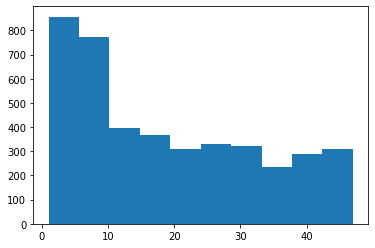

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(customer_join["membership_period"])

In [41]:
import pandas as pd
uselog=pd.read_csv("use_log.csv")
uselog.isnull().sum()
customer=pd.read_csv("customer_join.csv")
customer.isnull().sum()

customer_id             0
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
dtype: int64

In [42]:
customer_clustering=customer[["mean","median","max","min","membership_period"]]
customer_clustering.head()

,mean,median,max,min,membership_period
0,4.833333,5.0,8,2,47
1,5.083333,5.0,7,3,47
2,4.583333,5.0,6,3,47
3,4.833333,4.5,7,2,47
4,3.916667,4.0,6,1,47


In [46]:
!pip install --upgrade pip

!pip install scipy

!pip install -U scikit-learn

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
customer_clustering_sc=sc.fit_transform(customer_clustering)

kmeans=kMeans(n_cluster=4,random_state=0)
clusters=kmeans.fit(customer_clustering_sc)
customer_clustering["cluster"]=clusters.labels_
print(custmer_clustering["cluster"].unique())
customer_clustering.head()

ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\Moribito\\AppData\\Local\\Temp\\pip-uninstall-ns6bssta\\pip.exe'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: pip
    Found existing installation: pip 21.0.1
    Uninstalling pip-21.0.1:
      Successfully uninstalled pip-21.0.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\Moribito\\anaconda3\\Lib\\site-packages\\~klearn\\cluster\\_dbscan_inner.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



NameError: name 'kMeans' is not defined